# Tutorial 2: Feature Engineering and ML Preparation

Welcome back! In the previous tutorial, we learned how to load and clean data. Now we'll take the next step: **transforming our clean data into features that machine learning models can learn from effectively**.

## What is Feature Engineering?

Feature engineering is the art and science of creating new features from existing data to improve model performance. It's often said that:

> *"Better features beat better algorithms."*

A simple model with great features often outperforms a complex model with poor features!

## Why Does This Matter for ML?

- **Better Predictions**: Well-engineered features help models find patterns more easily
- **Reduced Complexity**: Good features can make simple models work as well as complex ones
- **Domain Knowledge**: Feature engineering lets you incorporate what you know about the problem
- **Model Performance**: Can dramatically improve accuracy, precision, and other metrics

## What We'll Learn

1. **Feature Scaling & Normalization** - Making features comparable
2. **Encoding Techniques** - Advanced categorical encoding
3. **Feature Creation** - Building new features from existing ones
4. **Feature Selection** - Choosing the most important features
5. **Train-Test Splitting** - Properly dividing data for ML
6. **Handling Imbalanced Data** - Dealing with unequal class distributions

Let's get started! 🚀

## Import Libraries and Load Data

We'll start by importing our essential libraries and loading the Titanic dataset.

In [74]:
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

### Load and Prepare the Titanic Dataset

Let's load the data and perform the basic cleaning steps we learned in the previous tutorial.

In [75]:
# Load the dataset
df = sns.load_dataset('titanic')

# Quick cleaning (from previous tutorial)
df_clean = df.copy()

# Fill missing values
df_clean['age'].fillna(df_clean['age'].median(), inplace=True)
df_clean['embarked'].fillna(df_clean['embarked'].mode()[0], inplace=True)

# Drop columns with too many missing values
df_clean.drop(columns=['deck', 'embark_town'], inplace=True)

print(f"Dataset loaded: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
print("\nFirst few rows:")
df_clean.head()

Dataset loaded: 891 rows, 13 columns

First few rows:


C:\Users\nehera\AppData\Local\Temp\ipykernel_17940\625854397.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['age'].fillna(df_clean['age'].median(), inplace=True)
C:\Users\nehera\AppData\Local\Temp\ipykernel_17940\625854397.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,no,True


## Feature Scaling and Normalization

### Why Scale Features?

Different features often have different scales:
- **Age**: 0-80 years
- **Fare**: 0-500+ dollars
- **Pclass**: 1, 2, or 3

Many ML algorithms (like SVM, KNN, Neural Networks) are sensitive to feature scales. Features with larger ranges can dominate the learning process!

### Two Main Approaches:

1. **Standardization (Z-score normalization)**: Centers data around mean=0, std=1
   - Formula: `(x - mean) / std`
   - Use when: Data follows normal distribution, or algorithm assumes this (SVM, Logistic Regression)

2. **Min-Max Scaling**: Scales data to a fixed range [0, 1]
   - Formula: `(x - min) / (max - min)`
   - Use when: You need bounded values, or data doesn't follow normal distribution

Let's see both in action!

In [76]:
# Select numerical features to scale
numerical_features = ['age', 'fare', 'sibsp', 'parch']

# Before scaling - look at the distributions
print("BEFORE SCALING:")
print(df_clean[numerical_features].describe())
print("\nNotice the different scales: age (0-80), fare (0-512), etc.")

BEFORE SCALING:
           age     fare    sibsp    parch
count  891.000  891.000  891.000  891.000
mean    29.362   32.204    0.523    0.382
std     13.020   49.693    1.103    0.806
min      0.420    0.000    0.000    0.000
25%     22.000    7.910    0.000    0.000
50%     28.000   14.454    0.000    0.000
75%     35.000   31.000    1.000    0.000
max     80.000  512.329    8.000    6.000

Notice the different scales: age (0-80), fare (0-512), etc.


### StandardScaler (Standardization)

In [77]:
# Create a copy for standardization
df_standardized = df_clean.copy()

# Initialize the scaler
scaler_standard = StandardScaler()

# Fit and transform the data
df_standardized[numerical_features] = scaler_standard.fit_transform(df_clean[numerical_features])

print("AFTER STANDARDIZATION (StandardScaler):")
print(df_standardized[numerical_features].describe())
print("\nNotice: mean ≈ 0, std ≈ 1 for all features!")

AFTER STANDARDIZATION (StandardScaler):
             age       fare      sibsp      parch
count  8.910e+02  8.910e+02  8.910e+02  8.910e+02
mean   2.273e-16  3.987e-18  4.386e-17  5.383e-17
std    1.001e+00  1.001e+00  1.001e+00  1.001e+00
min   -2.224e+00 -6.484e-01 -4.745e-01 -4.737e-01
25%   -5.657e-01 -4.891e-01 -4.745e-01 -4.737e-01
50%   -1.046e-01 -3.574e-01 -4.745e-01 -4.737e-01
75%    4.333e-01 -2.425e-02  4.328e-01 -4.737e-01
max    3.892e+00  9.667e+00  6.784e+00  6.974e+00

Notice: mean ≈ 0, std ≈ 1 for all features!


### MinMaxScaler (Normalization)

In [78]:
# Create a copy for min-max scaling
df_normalized = df_clean.copy()

# Initialize the scaler
scaler_minmax = MinMaxScaler()

# Fit and transform the data
df_normalized[numerical_features] = scaler_minmax.fit_transform(df_clean[numerical_features])

print("AFTER MIN-MAX SCALING:")
print(df_normalized[numerical_features].describe())
print("\nNotice: all values are between 0 and 1!")

AFTER MIN-MAX SCALING:
           age     fare    sibsp    parch
count  891.000  891.000  891.000  891.000
mean     0.364    0.063    0.065    0.064
std      0.164    0.097    0.138    0.134
min      0.000    0.000    0.000    0.000
25%      0.271    0.015    0.000    0.000
50%      0.347    0.028    0.000    0.000
75%      0.435    0.061    0.125    0.000
max      1.000    1.000    1.000    1.000

Notice: all values are between 0 and 1!


### Visualizing the Difference

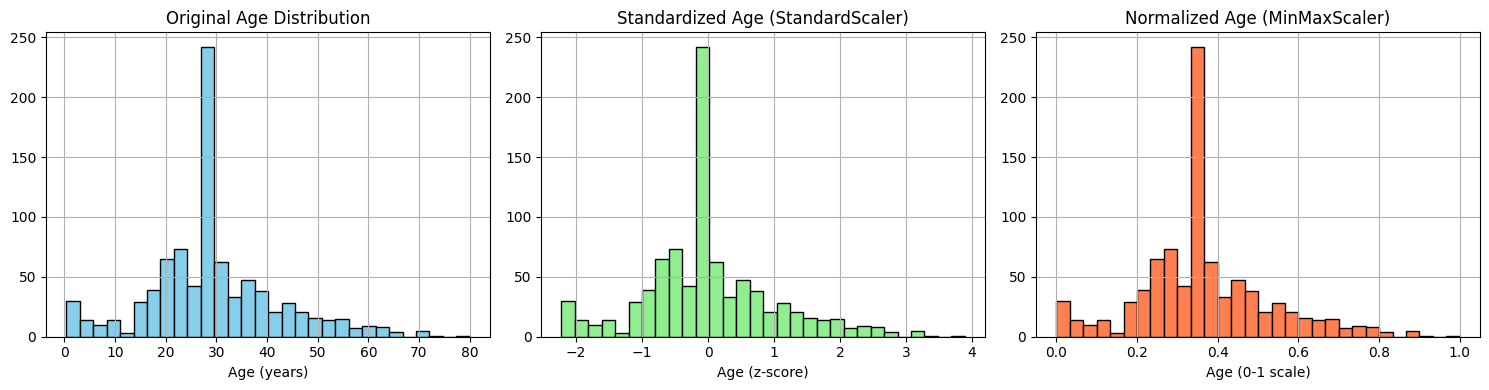

Key Insight: Shape stays the same, but the scale changes!


In [79]:
# Compare age distribution across different scaling methods
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original
df_clean['age'].hist(bins=30, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Original Age Distribution')
axes[0].set_xlabel('Age (years)')

# Standardized
df_standardized['age'].hist(bins=30, ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Standardized Age (StandardScaler)')
axes[1].set_xlabel('Age (z-score)')

# Normalized
df_normalized['age'].hist(bins=30, ax=axes[2], color='coral', edgecolor='black')
axes[2].set_title('Normalized Age (MinMaxScaler)')
axes[2].set_xlabel('Age (0-1 scale)')

plt.tight_layout()
plt.show()

print("Key Insight: Shape stays the same, but the scale changes!")

## Categorical Encoding

In the previous tutorial, we used simple encoding. Now let's explore more sophisticated techniques!

### Encoding Methods:
1. **Label Encoding**: Convert to integers (0, 1, 2, ...)
2. **One-Hot Encoding**: Create binary columns
3. **Frequency Encoding**: Replace with category frequency


### Label Encoding (for binary or ordinal features)

In [80]:
# Use our standardized dataframe
df_encoded = df_standardized.copy()

# Label encode 'sex' (binary: male/female)
label_encoder = LabelEncoder()
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])

print("Sex encoding:")
print(df_encoded[['sex', 'sex_encoded']].drop_duplicates().sort_values('sex_encoded'))
print(f"\nMapping: female={label_encoder.transform(['female'])[0]}, male={label_encoder.transform(['male'])[0]}")

Sex encoding:
      sex  sex_encoded
1  female            0
0    male            1

Mapping: female=0, male=1


### One-Hot Encoding (for nominal features)

In [81]:
# One-hot encode 'embarked' (nominal: no natural order)
embarked_dummies = pd.get_dummies(df_encoded['embarked'], prefix='embarked', drop_first=True)

# Add to dataframe
df_encoded = pd.concat([df_encoded, embarked_dummies], axis=1)

print("One-hot encoding for 'embarked':")
print(df_encoded[['embarked', 'embarked_Q', 'embarked_S']].head(10))
print("\nNote: We dropped first category 'embarked_C' to avoid multicollinearity which is when two or more predictor variables are highly correlated.")
print("If embarked_Q=0 and embarked_S=0, then embarked='C'")

One-hot encoding for 'embarked':
  embarked  embarked_Q  embarked_S
0        S       False        True
1        C       False       False
2        S       False        True
3        S       False        True
4        S       False        True
5        Q        True       False
6        S       False        True
7        S       False        True
8        S       False        True
9        C       False       False

Note: We dropped first category 'embarked_C' to avoid multicollinearity which is when two or more predictor variables are highly correlated.
If embarked_Q=0 and embarked_S=0, then embarked='C'


### Frequency Encoding (useful for high-cardinality features)

In [82]:
# Frequency encode 'class' - how often does each class appear?
class_freq = df_encoded['class'].value_counts(normalize=True)
df_encoded['class_frequency'] = df_encoded['class'].map(class_freq)

print("Frequency encoding for 'class':")
print(df_encoded[['class', 'class_frequency']].drop_duplicates().sort_values('class'))
print("\nThis tells us: Third class is most common (~55%), First is least (~24%)")

Frequency encoding for 'class':
    class class_frequency
1   First           0.242
9  Second           0.207
0   Third           0.551

This tells us: Third class is most common (~55%), First is least (~24%)


## Feature Engineering Revisited

Now let's create some new features from existing ones! This is where domain knowledge really shines.

### Domain Knowledge Applied:
- **Families** might have different survival rates
- **Age groups** (children, adults, elderly) had different priorities
- **Wealth indicators** like fare per person can be more informative than total fare

In [83]:
# 1. Family Size Features
# Combine siblings/spouses and parents/children, then add 1 for the person themselves
df_encoded['family_size'] = df_encoded['sibsp'] + df_encoded['parch'] + 1

# Is traveling alone?
df_encoded['is_alone'] = (df_encoded['family_size'] == 1).astype(int)

print("Family-based features created:")
print(df_encoded[['sibsp', 'parch', 'family_size', 'is_alone']].head(10))
print(f"\nSurvival rate - Alone: {df_encoded[df_encoded['is_alone']==1]['survived'].mean():.2%}")
print(f"Survival rate - With family: {df_encoded[df_encoded['is_alone']==0]['survived'].mean():.2%}")

Family-based features created:
   sibsp  parch  family_size  is_alone
0  0.433 -0.474        0.959         0
1  0.433 -0.474        0.959         0
2 -0.475 -0.474        0.052         0
3  0.433 -0.474        0.959         0
4 -0.475 -0.474        0.052         0
5 -0.475 -0.474        0.052         0
6 -0.475 -0.474        0.052         0
7  2.247  0.768        4.015         0
8 -0.475  2.009        2.534         0
9  0.433 -0.474        0.959         0

Survival rate - Alone: nan%
Survival rate - With family: 38.38%


In [84]:
# 2. Age-based Features
# Is child? (under 18 - "children first" policy)
df_encoded['is_child'] = (df_encoded['age'] < 18).astype(int)

# Is elderly? (over 60)
df_encoded['is_elderly'] = (df_encoded['age'] > 60).astype(int)

print("Age-based features created:")
print(df_encoded[['age', 'is_child', 'is_elderly']].head(15))
print(f"\nSurvival rate - Children: {df_encoded[df_encoded['is_child']==1]['survived'].mean():.2%}")
print(f"Survival rate - Adults: {df_encoded[(df_encoded['is_child']==0) & (df_encoded['is_elderly']==0)]['survived'].mean():.2%}")
print(f"Survival rate - Elderly: {df_encoded[df_encoded['is_elderly']==1]['survived'].mean():.2%}")

Age-based features created:
      age  is_child  is_elderly
0  -0.566         1           0
1   0.664         1           0
2  -0.258         1           0
3   0.433         1           0
4   0.433         1           0
5  -0.105         1           0
6   1.893         1           0
7  -2.103         1           0
8  -0.181         1           0
9  -1.181         1           0
10 -1.949         1           0
11  2.201         1           0
12 -0.719         1           0
13  0.741         1           0
14 -1.181         1           0

Survival rate - Children: 38.38%
Survival rate - Adults: nan%
Survival rate - Elderly: nan%


In [85]:
# 3. Fare per Person (Wealth Indicator)
# Total fare might be for a whole family, so divide by family size
df_encoded['fare_per_person'] = df_encoded['fare'] / df_encoded['family_size']

print("Fare-based features created:")
print(df_encoded[['fare', 'family_size', 'fare_per_person', 'pclass']].head(10))

# Compare fare per person by class
print("\nAverage fare per person by class:")
print(df_encoded.groupby('pclass')['fare_per_person'].mean())

print("\n✅ All new features created successfully!")

Fare-based features created:
    fare  family_size  fare_per_person  pclass
0 -0.502        0.959           -0.524       3
1  0.787        0.959            0.820       1
2 -0.489        0.052           -9.441       3
3  0.421        0.959            0.439       1
4 -0.486        0.052           -9.392       3
5 -0.478        0.052           -9.233       3
6  0.396        0.052            7.644       1
7 -0.224        4.015           -0.056       3
8 -0.424        2.534           -0.167       3
9 -0.043        0.959           -0.045       2

Average fare per person by class:
pclass
1    6.642
2   -4.012
3   -5.942
Name: fare_per_person, dtype: float64

✅ All new features created successfully!


## Feature Selection

We've created many features! But more features ≠ better model. We need to select the most important ones.

### Why Feature Selection?
- **Reduces overfitting**: Fewer features = simpler, more generalizable model
- **Faster training**: Less data to process
- **Better interpretability**: Easier to understand what drives predictions
- **Removes noise**: Irrelevant features can hurt performance

### Methods:
1. **Statistical Tests**: F-score, chi-squared
2. **Correlation Analysis**: Which features correlate with target?
3. **Feature Importance**: From tree-based models (bonus thing for you to explore)

### Correlation Analysis

In [86]:
# Select only numerical features for correlation
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation with target (survived)
correlations = df_encoded[numerical_cols].corr()['survived'].sort_values(ascending=False)

print("Top features correlated with survival:")
print(correlations.head(15))

Top features correlated with survival:
survived           1.000
fare               0.257
fare_per_person    0.224
parch              0.082
family_size        0.028
sibsp             -0.035
age               -0.065
pclass            -0.338
sex_encoded       -0.543
is_alone             NaN
is_child             NaN
is_elderly           NaN
Name: survived, dtype: float64


### Visualize Feature Correlations

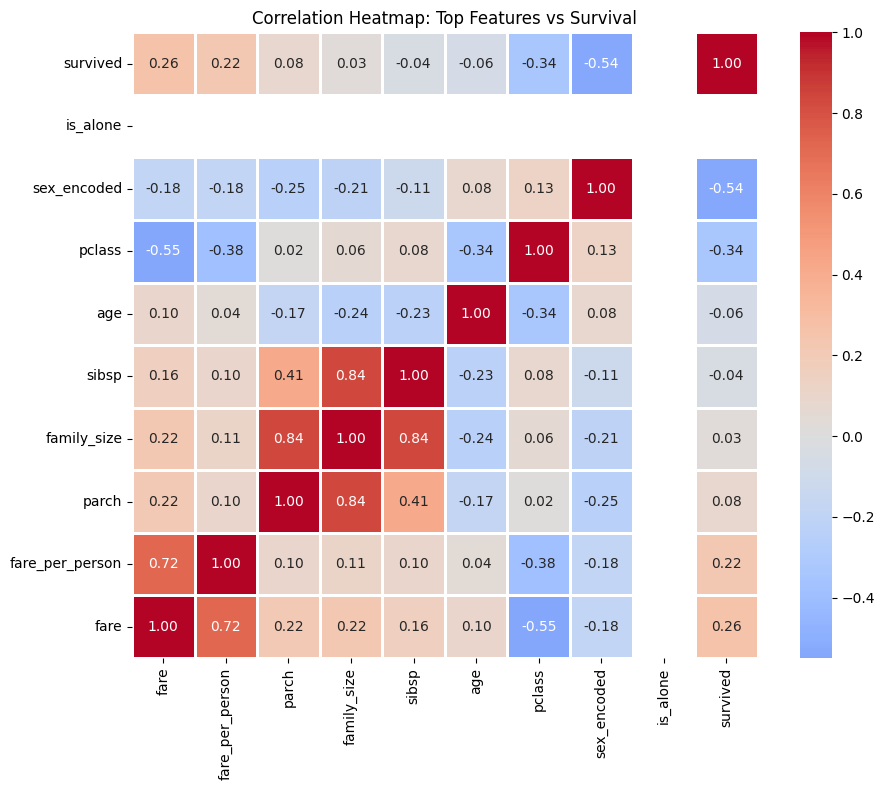

In [87]:
# Top correlated features
top_features = correlations.head(10).index.tolist()
top_features.remove('survived')  # Remove target itself

# Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded[top_features + ['survived']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, yticklabels=True)
plt.title('Correlation Heatmap: Top Features vs Survival')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### SelectKBest (Statistical Feature Selection)

Top features selected by F-score:
1. pclass: 115.03
2. age: 3.76
3. parch: 5.96
4. fare: 63.03
5. sex_encoded: 372.41
6. fare_per_person: 46.98


c:\Users\nehera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [7 8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\nehera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


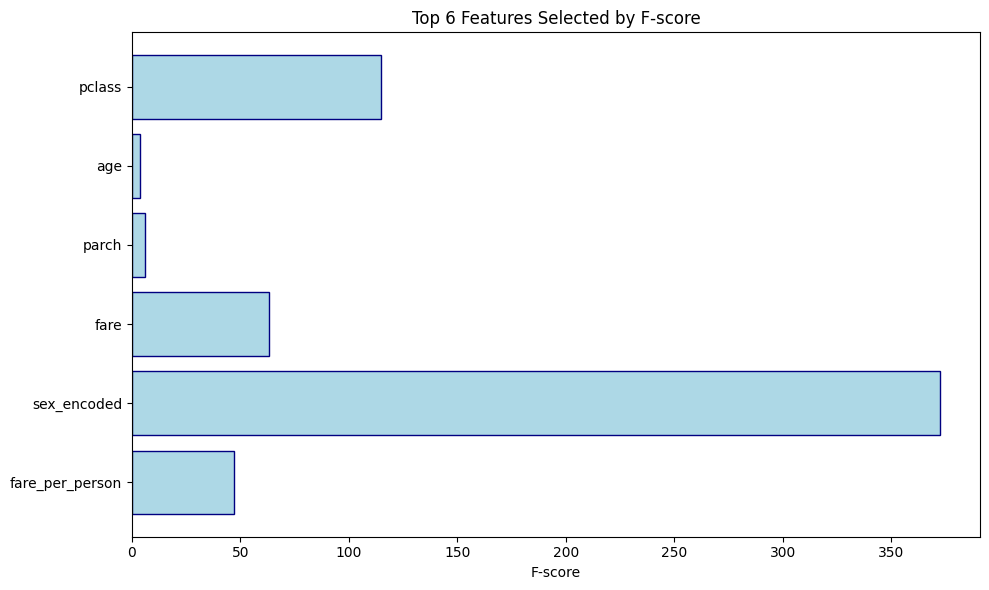

In [88]:
# Prepare features and target
X = df_encoded[numerical_cols].drop('survived', axis=1)
y = df_encoded['survived']

# Remove any remaining NaN values
X = X.fillna(0)

# Select top 10 features using F-score
selector = SelectKBest(f_classif, k=6)
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()].tolist()

print("Top features selected by F-score:")
for i, feature in enumerate(selected_features, 1):
    score = selector.scores_[X.columns.get_loc(feature)]
    print(f"{i}. {feature}: {score:.2f}")

# Visualize the scores
plt.figure(figsize=(10, 6))
feature_scores = [selector.scores_[X.columns.get_loc(feature)] for feature in selected_features]
plt.barh(selected_features, feature_scores, color='lightblue', edgecolor='navy')
plt.xlabel('F-score')
plt.title('Top 6 Features Selected by F-score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Train-Test Split

### Critical Concept: Never Test on Training Data!

If we train and test on the same data, our model will appear perfect but fail on new data. This is called **overfitting**.

### The Solution: Train-Test Split
- **Training Set** (typically 70-80%): Used to train the model
- **Test Set** (typically 20-30%): Used to evaluate the model

The model NEVER sees the test set during training!

### Important: When to Split?
-  Split AFTER cleaning
-  Split BEFORE feature scaling (to avoid data leakage)
-  Use stratification for imbalanced datasets

In [89]:
# Select our final features (using top correlated features)
final_features = ['sex_encoded', 'pclass', 'fare', 'age', 'family_size', 
                  'fare_per_person', 'is_child', 'is_alone', 'embarked_Q', 'embarked_S']

X_final = df_encoded[final_features].fillna(0)
y_final = df_encoded['survived']

# Perform the split
# stratify=y ensures same proportion of survived/died in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y_final    # Maintain class distribution
)

print("Dataset split completed!")
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nFeatures: {X_train.shape[1]}")

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))
print("\n Distributions are similar - stratification worked!")

Dataset split completed!

Training set: 712 samples
Test set: 179 samples

Features: 10

Class distribution in training set:
survived
0    0.617
1    0.383
Name: proportion, dtype: float64

Class distribution in test set:
survived
0    0.615
1    0.385
Name: proportion, dtype: float64

 Distributions are similar - stratification worked!


### Scaling AFTER Split (Critical!)

In [90]:
# Initialize scaler
scaler = StandardScaler()

# Fit ONLY on training data
scaler.fit(X_train)

# Transform both sets using the same scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for easier viewing
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaling completed!")
print("\nTraining set statistics (after scaling):")
print(X_train_scaled.describe())

print("\"Why fit only on training data?")
print("To prevent DATA LEAKAGE: Test data information shouldn't influence training!")

Scaling completed!

Training set statistics (after scaling):
       sex_encoded     pclass       fare        age  family_size  \
count    7.120e+02  7.120e+02  7.120e+02  7.120e+02    7.120e+02   
mean    -9.980e-18 -1.821e-16 -1.996e-17 -2.994e-17    9.231e-17   
std      1.001e+00  1.001e+00  1.001e+00  1.001e+00    1.001e+00   
min     -1.347e+00 -1.571e+00 -6.626e-01 -2.229e+00   -5.579e-01   
25%     -1.347e+00 -3.709e-01 -4.982e-01 -5.727e-01   -5.579e-01   
50%      7.424e-01  8.296e-01 -3.616e-01 -1.121e-01   -5.579e-01   
75%      7.424e-01  8.296e-01 -1.707e-02  5.021e-01    1.852e-01   
max      7.424e-01  8.296e-01  1.001e+01  3.880e+00    5.274e+00   

       fare_per_person  is_child  is_alone  embarked_Q  embarked_S  
count        7.120e+02     712.0     712.0   7.120e+02   7.120e+02  
mean         2.495e-18       0.0       0.0  -5.239e-17   1.497e-16  
std          1.001e+00       0.0       0.0   1.001e+00   1.001e+00  
min         -7.346e-01       0.0       0.0  -2.893

## Step 6: Handling Imbalanced Data

Let's check if our classes are balanced:

Class Distribution:
Died (0): 439 (61.7%)
Survived (1): 273 (38.3%)

Imbalance ratio: 1.61:1

Classes are somewhat imbalanced!
This is moderate imbalance. Consider:
- Using class_weight='balanced' in models
- Focusing on precision/recall instead of just accuracy
- Using stratified sampling (already done!)


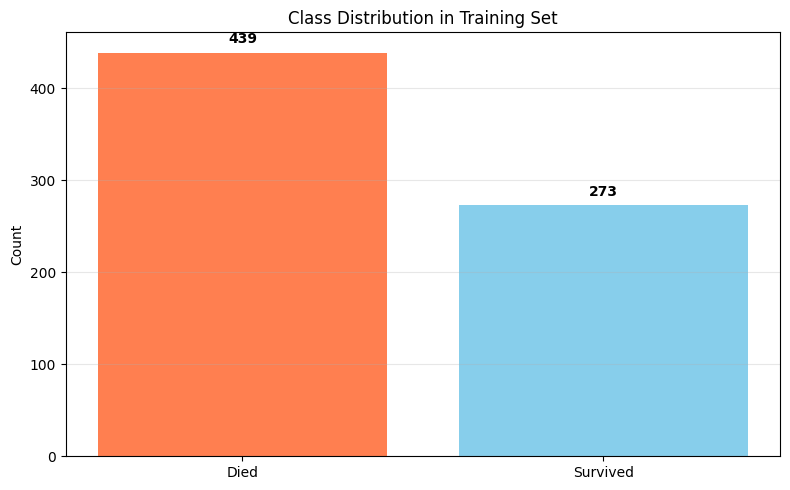

In [91]:
# Check class balance
class_distribution = y_train.value_counts()
class_percentages = y_train.value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"Died (0): {class_distribution[0]} ({class_percentages[0]:.1f}%)")
print(f"Survived (1): {class_distribution[1]} ({class_percentages[1]:.1f}%)")

imbalance_ratio = class_distribution[0] / class_distribution[1]
print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("\nClasses are somewhat imbalanced!")
    print("This is moderate imbalance. Consider:")
    print("- Using class_weight='balanced' in models")
    print("- Focusing on precision/recall instead of just accuracy")
    print("- Using stratified sampling (already done!)")
else:
    print("\nClasses are reasonably balanced!")

# Visualize
plt.figure(figsize=(8, 5))
plt.bar(['Died', 'Survived'], class_distribution.values, color=['coral', 'skyblue'])
plt.title('Class Distribution in Training Set')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(class_distribution.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

## Step 7: Final Data Summary

Let's review what we've prepared for machine learning!

In [92]:
print("="*60)
print("FINAL ML-READY DATASET SUMMARY")
print("="*60)

print("\nDataset Shape:")
print(f"   Training: {X_train_scaled.shape}")
print(f"   Testing:  {X_test_scaled.shape}")

print("\nTarget Variable:")
print(f"   Name: 'survived' (binary: 0=died, 1=survived)")
print(f"   Training samples: {len(y_train)}")
print(f"   Test samples: {len(y_test)}")

print("\nFeatures Used:")
for i, feature in enumerate(final_features, 1):
    print(f"   {i}. {feature}")

print("\nPreprocessing Applied:")
print("   - Missing values handled (median/mode imputation)")
print("   - Features scaled (StandardScaler)")
print("   - Categorical variables encoded (Label + One-Hot)")
print("   - New features engineered (family_size, fare_per_person, etc.)")
print("   - Train-test split performed (80-20)")
print("   - Stratified sampling to maintain class balance")

print("\nData is ready for machine learning models!")
print("="*60)

FINAL ML-READY DATASET SUMMARY

Dataset Shape:
   Training: (712, 10)
   Testing:  (179, 10)

Target Variable:
   Name: 'survived' (binary: 0=died, 1=survived)
   Training samples: 712
   Test samples: 179

Features Used:
   1. sex_encoded
   2. pclass
   3. fare
   4. age
   5. family_size
   6. fare_per_person
   7. is_child
   8. is_alone
   9. embarked_Q
   10. embarked_S

Preprocessing Applied:
   - Missing values handled (median/mode imputation)
   - Features scaled (StandardScaler)
   - Categorical variables encoded (Label + One-Hot)
   - New features engineered (family_size, fare_per_person, etc.)
   - Train-test split performed (80-20)
   - Stratified sampling to maintain class balance

Data is ready for machine learning models!


### Additional Techniques to Explore:

- **PCA** (Principal Component Analysis) - Dimensionality reduction
- **Polynomial Features** - Create interaction terms automatically
- **Target Encoding** - Use target statistics for encoding
- **SMOTE** - Synthetic data generation for imbalanced classes
- **Feature Importance** - From tree-based models

##### Never stop learning! If you stop learning, you'll get left behind in this industry.

## Practice Exercise: Apply to Iris Dataset

Now it's your turn! Apply these techniques to the Iris dataset from the previous tutorial.

**Tasks:**
1. Load the Iris dataset from `data/Iris.csv`
2. Encode the Species column
3. Split into train-test sets (80-20)
4. Scale the features using StandardScaler
5. Check if the classes are balanced

In [ ]:
# Load the Iris dataset

# Separate features and target
X = ...
y = ...

# Encode species using LabelEncoder
le = LabelEncoder()
y = ...

# Perform train-test split
X_train, X_test, y_train, y_test = ...

# Print the 4 dataset shapes

# Scale features using StandardScaler (fit_transform for training vs transform for test)
scaler = StandardScaler()
X_train = ...
X_test = ...

# Show the mean and std of scaled features
print("\nScaled feature statistics (training set):")
print(f"Mean (should be ~0): {np.mean(X_train, axis=0)}")
print(f"Std (should be ~1): {np.std(X_train, axis=0)}\n")

# Visualize class distribution
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(le.inverse_transform(unique), counts))
classes = class_distribution.keys()
counts = class_distribution.values()

plt.figure(figsize=(8, 5))
# Matplotlib bar chart goes here - make each bar a different color :)
plt.show()


TypeError: cannot unpack non-iterable ellipsis object